<a href="https://colab.research.google.com/github/SetuKaswan/zeotap/blob/main/Setu_Kaswan_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing the data

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers_url = 'https://raw.githubusercontent.com/SetuKaswan/zeotap/refs/heads/main/Customers.csv'
products_url = 'https://raw.githubusercontent.com/SetuKaswan/zeotap/refs/heads/main/Products.csv'
transactions_url = 'https://raw.githubusercontent.com/SetuKaswan/zeotap/refs/heads/main/Transactions.csv'

In [3]:
from urllib.request import urlretrieve
urlretrieve(customers_url, 'customers.csv')
urlretrieve(products_url, 'products.csv')
urlretrieve(transactions_url, 'transactions.csv')

('transactions.csv', <http.client.HTTPMessage at 0x7e860af51410>)

In [4]:
customers = pd.read_csv('customers.csv')
transactions = pd.read_csv('transactions.csv')

In [6]:
customers.head()
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [7]:
transactions = transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum'
}).reset_index()

customer_data = customers.merge(transactions, on='CustomerID', how='left')
customer_data.fillna({'TotalValue': 0, 'Quantity': 0}, inplace=True)

In [9]:
features = customer_data[['TotalValue', 'Quantity']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
customer_data['Cluster'] = kmeans.fit_predict(features_scaled)

customer_data[['CustomerID', 'Cluster']].to_csv('Customer_Clusters.csv', index=False)


In [10]:
cluster_labels = customer_data['Cluster']

db_index = davies_bouldin_score(features_scaled, cluster_labels)
print(f"Davies-Bouldin Index: {db_index:.3f}")

silhouette_avg = silhouette_score(features_scaled, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.3f}")

Davies-Bouldin Index: 0.710
Silhouette Score: 0.454


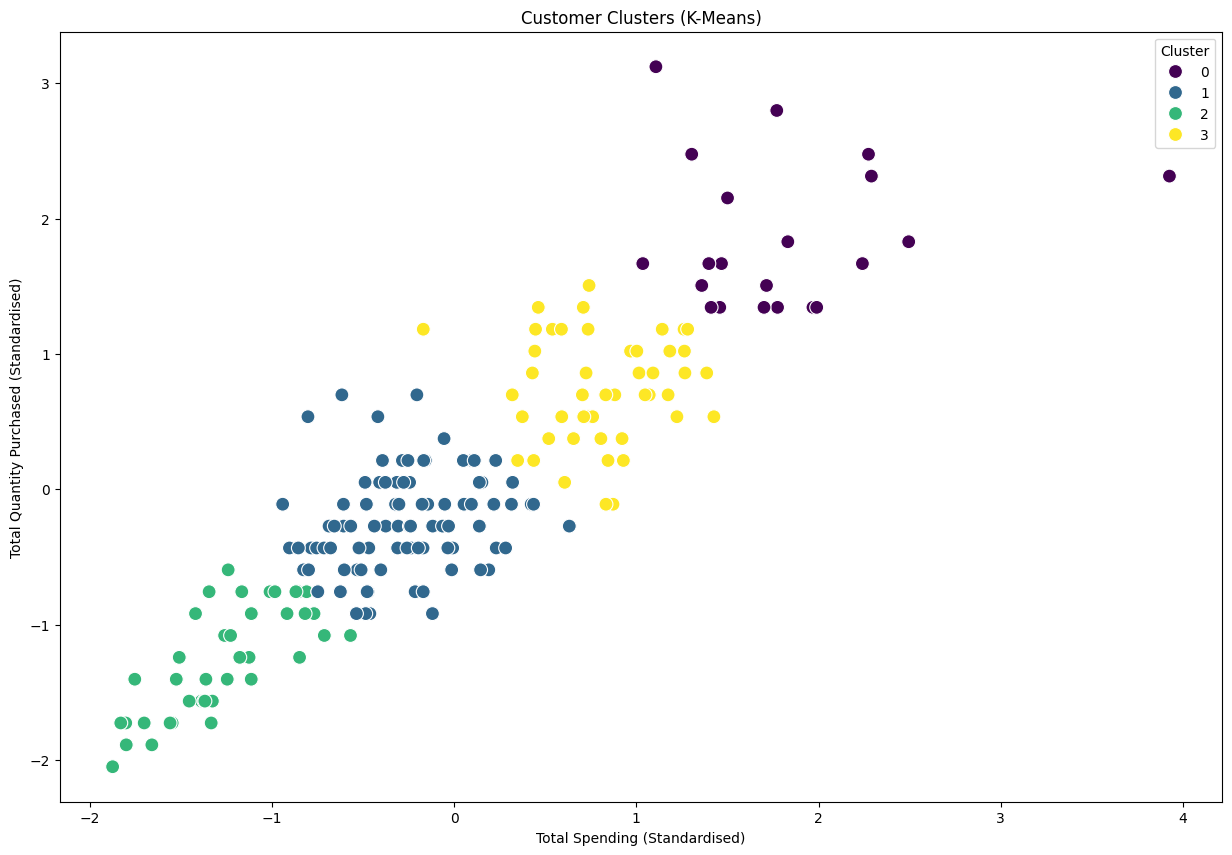

In [12]:
plt.figure(figsize=(15, 10))
sns.scatterplot(
    x=features_scaled[:, 0],
    y=features_scaled[:, 1],
    hue=cluster_labels,
    palette='viridis',
    s=100
)
plt.title('Customer Clusters (K-Means)')
plt.xlabel('Total Spending (Standardised)')
plt.ylabel('Total Quantity Purchased (Standardised)')
plt.legend(title='Cluster')
plt.show()